## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')
pd.set_option('display.max_columns',None)

## Importing Datasets

In [2]:
file1617 = pd.read_excel('staff utlz latest 16-17_masked.xlsx',header=[0,1])
file1718 = pd.read_excel('staff utlz latest 17-18_masked.xlsx',header=[0,1])
termination = pd.read_excel('Terminations 15-18.xlsx')

## Feature engineering

In [3]:
file1617.shape

(789, 115)

In [4]:
file1617.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
         Employee No      Profit Center      Employee Name  Employee Position   
0                  1             PC - 1   Rochette Jilleen            Level 2   
1                  2             PC - 2     Daryl Natalina            Level 2   
2                  3             PC - 2  Annnora Gabrielle            Level 2   
3                  4             PC - 3        Barbee Joey            Level 2   
4                  5             PC - 4   Idalina Lauraine            Level 1   

  Unnamed: 4_level_0    Unnamed: 5_level_0 Unnamed: 6_level_0  \
   Employee Location          People Group  Employee Category   
0         Location 3  Client Service Staff          Level 1/2   
1         Location 7  Client Service Staff          Level 1/2   
2         Location 7  Client Service Staff          Level 1/2   
3         Location 1  Client Service Staff          Level 1/2   
4         Location 3  Client Service Staff          Level 1/2   

  Unnamed: 7_level_0 Unnamed: 8_level_0 Unnamed: 9_level_0       Month Year  \
     Supervisor name          Join Date     Current Status Termination Date   
0   Idalina Lauraine         2000-09-30             Active                -   
1   Idalina Lauraine         1999-05-31             Active                -   
2   Idalina Lauraine         2001-01-31             Active                -   
3   Idalina Lauraine         2000-09-30             Active                -   
4      Abagail Druci         1998-06-30             Active                -   

     Apr 2016                                                              \
  Total Hours Total Available Hours Work Hours Leave Hours Training Hours   
0         168                   160         55           8              0   
1         168                   152         54           8              8   
2         168                   144         59          16              8   
3         168                   152         17          16              0   
4         168                   168          4           0              0   

                                    May 2016                                   \
  BD Hours NC Hours Utilization% Total Hours Total Available Hours Work Hours   
0      102        0      0.34375         176                   168         32   
1       44       74     0.355263         176                   152         24   
2       43       60     0.409722         176                   184       52.5   
3      127        8     0.111842         176                   160         21   
4      117       98      0.02381         176                   168         11   

                                                               Jun 2016  \
  Leave Hours Training Hours BD Hours NC Hours Utilization% Total Hours   
0           8              0      168        8     0.190476         176   
1          24              0       65       67     0.157895         176   
2          -8              0     69.5       62     0.285326         176   
3           0             16      115        8      0.13125         176   
4           8              0      146       60     0.065476         176   

                                                                        \
  Total Available Hours Work Hours Leave Hours Training Hours BD Hours   
0                   152         12          24              0       44   
1                   172         86           4              0       47   
2                   168         43           8              0       61   
3                   176         27           0              0      141   
4                   176         14           0              0      112   

                           Jul 2016                                   \
  NC Hours Utilization% Total Hours Total Available Hours Work Hours   
0        0     0.078947         168                   134         69   
1       50          0.5         168                   1

In [5]:
#takes Total Hours and Total Available Hours columns
tmpfile1 = file1617['Total']
tmpfile2 = file1718['Total']

In [6]:
tmpfile1.drop('Utilization%',axis=1,inplace=True)
tmpfile2.drop('Utilization%',axis=1,inplace=True)

C:\Users\sonal\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
#Adjusting the header for both data
tmpfile3 = file1617.iloc[:,0:11]
tmpfile3 = tmpfile3.droplevel(level=0,axis=1)

tmpfile4 = file1718.iloc[:,0:11]
tmpfile4 = tmpfile4.droplevel(level=0,axis=1)

In [8]:
df1 = pd.concat([tmpfile3,tmpfile1],axis=1)
df2 = pd.concat([tmpfile4,tmpfile2],axis=1)

### Year 2016-17 data

In [9]:
df1.head()

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,-,2088,1802.0,636.0,216.0,70.0,1192.0,56.0
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,-,2088,1882.0,555.5,156.0,50.0,694.0,734.0
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,-,2088,1898.5,1004.5,144.0,45.5,507.0,549.5
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,-,2088,1851.0,273.0,208.0,29.0,1382.0,255.0
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,-,1312,1205.0,149.0,104.0,3.0,1159.0,818.0


In [10]:
tenure = pd.to_datetime('2017-04-01')
resigned = pd.to_datetime('2016-04-01')

In [11]:
df1['date'] = df1['Termination Date'].copy()
df1['date'] = df1['date'].replace('-',tenure)

In [12]:
# to get year wise data 
df1['year_identifier'] = pd.DatetimeIndex(df1['date']).year

In [13]:
df1.tail(5)

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,date,year_identifier
784,785,PC - 6,Maurine Jessika,Level 8,Location 1,Client Service Staff,Staff on Probation,Tiena Hatti,2017-03-31,New Joiner,-,80,32.0,32.0,8.0,40.0,0.0,0.0,2017-04-01,2017
785,786,PC - 3,Ainsley Benedetta,Level 8,Location 1,Client Service Staff,Staff on Probation,Kristina Alleen,2017-03-31,New Joiner,-,80,40.0,0.0,0.0,40.0,0.0,40.0,2017-04-01,2017
786,787,PC - 5,Calli Celene,Level 8,Location 3,Client Service Staff,Staff on Probation,Lian Harley,2017-03-31,New Joiner,-,80,72.0,0.0,0.0,8.0,0.0,72.0,2017-04-01,2017
787,788,PC - 3,Myrna Brianna,Level 7,Location 4,Client Service Staff,Staff on Probation,Hedi Elna,2017-03-31,New Joiner,-,40,32.0,0.0,8.0,0.0,0.0,32.0,2017-04-01,2017
788,789,PC - 3,Bibbye Isabelle,Level 7,Location 1,Client Service Staff,Staff on Probation,Eydie Francine,2017-03-31,New Joiner,-,40,18.0,0.0,8.0,14.0,0.0,18.0,2017-04-01,2017


In [14]:
#to calculate tenure
#df1['Tenure(Years)'] = df1['date']- df1['Join Date']
#aggregate sum
#df1=df1.groupby('Employee No')['Tenure(Years)'].sum().dt.days.div(365).reset_index()

In [15]:
df1['months'] = (df1['date'] - df1['Join Date'])/np.timedelta64(1,'M')
df1.loc[df1['date']!=tenure,'months'] = (df1['date']-resigned)/np.timedelta64(1,'M')
df1['months'] = round(df1['months'],0)
df1.loc[df1['months']==0,'months'] = 1

# Tenure in year
df1['tenure_year'] = df1['months'].copy()
df1['tenure_year'] = round(df1['tenure_year']/12,1)

# for cal of utilization of 1 year
df1.loc[df1['months']>12,'months'] = 12

In [16]:
df1.head()

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,date,year_identifier,months,tenure_year
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,-,2088,1802.0,636.0,216.0,70.0,1192.0,56.0,2017-04-01,2017,12.0,16.5
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,-,2088,1882.0,555.5,156.0,50.0,694.0,734.0,2017-04-01,2017,12.0,17.8
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,-,2088,1898.5,1004.5,144.0,45.5,507.0,549.5,2017-04-01,2017,12.0,16.2
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,-,2088,1851.0,273.0,208.0,29.0,1382.0,255.0,2017-04-01,2017,12.0,16.5
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,-,1312,1205.0,149.0,104.0,3.0,1159.0,818.0,2017-04-01,2017,12.0,18.8


# Exploratory data analysis

In [17]:
df1['Current Status'].value_counts()

Active        628
Resigned      141
New Joiner     15
Secondment      5
Name: Current Status, dtype: int64

C:\Users\sonal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Status', ylabel='count'>

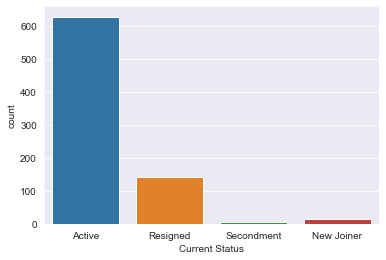

In [18]:
sns.countplot(df1['Current Status'])

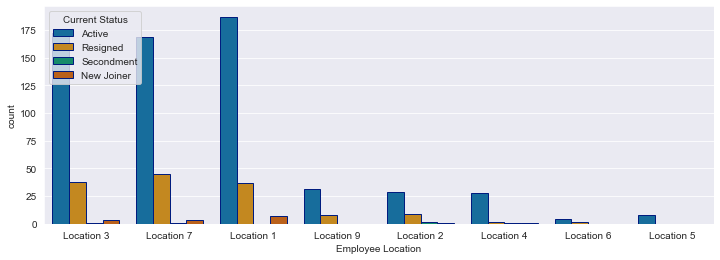

In [19]:
#Show the number of employees that left and stayed by location
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Employee Location', hue='Current Status', data = df1, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [20]:
cols = ['Total Hours','Total Available Hours','Work Hours','Leave Hours','Training Hours','BD Hours','NC Hours']

In [21]:
df1.groupby(["Employee Location","Current Status"]).size()

Employee Location  Current Status
Location 1         Active            187
                   New Joiner          7
                   Resigned           37
Location 2         Active             29
                   New Joiner          1
                   Resigned            9
                   Secondment          2
Location 3         Active            172
                   New Joiner          3
                   Resigned           38
                   Secondment          1
Location 4         Active             28
                   New Joiner          1
                   Resigned            2
                   Secondment          1
Location 5         Active              8
Location 6         Active              4
                   Resigned            2
Location 7         Active            169
                   New Joiner          3
                   Resigned           45
                   Secondment          1
Location 9         Active             31
                   Resi

In [22]:
df1.groupby(["Employee Position","Current Status"]).size()

Employee Position  Current Status
Level 1            Active              1
Level 10           Resigned            1
Level 2            Active              9
Level 3            Active             20
Level 4            Active             31
                   Resigned            6
Level 5            Active             69
                   New Joiner          1
                   Resigned           10
Level 6            Active            115
                   New Joiner          2
                   Resigned           33
                   Secondment          4
Level 7            Active            227
                   New Joiner          4
                   Resigned           39
Level 8            Active            149
                   New Joiner          8
                   Resigned           52
                   Secondment          1
Level A1           Active              1
Level A2           Active              3
Level A3           Active              3
dtype: int64

In [23]:
df1.groupby(["Profit Center","Current Status"]).size()

Profit Center  Current Status
PC - 1         Active            126
               Resigned           24
               Secondment          1
PC - 10        Resigned            1
PC - 2         Active            160
               New Joiner          3
               Resigned           39
               Secondment          1
PC - 3         Active            191
               New Joiner          7
               Resigned           36
               Secondment          2
PC - 4         Active              1
PC - 5         Active             77
               New Joiner          2
               Resigned           23
PC - 6         Active             68
               New Joiner          3
               Resigned           16
               Secondment          1
PC - 7         Active              3
               Resigned            2
PC - 8         Active              1
PC - 9         Active              1
dtype: int64

In [24]:
df1.groupby(["People Group","Current Status"]).size()

People Group          Current Status
Client Service Staff  Active            620
                      New Joiner         15
                      Resigned          141
                      Secondment          5
Support Staff         Active              8
dtype: int64

In [25]:
df1.groupby(["Employee Category","Current Status"]).size()

Employee Category             Current Status
Awaiting Termination          Active              3
                              Resigned            1
Confirmed Staff               Active            553
Level 1/2                     Active             10
Secondee-Outward-With Pay     Secondment          1
Secondee-Outward-Without Pay  Secondment          4
Serving Notice Period         Active             19
                              Resigned          139
Staff on Probation            Active             43
                              New Joiner         15
                              Resigned            1
dtype: int64

In [26]:
#filter operation
#df_pyspark.filter((df1['Current Status']=='Resigned'<=20000) | (df_pyspark['Salary']>=15000)).show()

In [27]:
df1['Current Status']=='Resigned'

0      False
1      False
2      False
3      False
4      False
       ...  
784    False
785    False
786    False
787    False
788    False
Name: Current Status, Length: 789, dtype: bool

In [28]:
df1.drop('Termination Date',axis=1,inplace=True)

In [29]:
df1.loc[df1['Current Status']=='Resigned','y'] = 1
df1.loc[df1['Current Status']!='Resigned','y'] = 0

In [30]:
df1['y'] = df1['y'].astype('int64')

In [31]:
df1.sample(5)

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,date,year_identifier,months,tenure_year,y
741,742,PC - 3,Amanda Kara,Level 6,Location 1,Client Service Staff,Staff on Probation,Nikolia Shirl,2017-01-31,Active,520,488.0,256.0,24.0,8.0,0.0,232.0,2017-04-01,2017,2.0,0.2,0
757,758,PC - 6,Catriona Dolli,Level 8,Location 1,Client Service Staff,Staff on Probation,Tiena Hatti,2017-03-31,New Joiner,160,104.0,8.0,8.0,48.0,0.0,96.0,2017-04-01,2017,1.0,0.1,0
181,182,PC - 1,Fanni Jacki,Level 6,Location 3,Client Service Staff,Confirmed Staff,Cynthia Leonora,2013-06-30,Active,2088,1808.0,1795.0,280.0,0.0,0.0,13.0,2017-04-01,2017,12.0,3.8,0
208,209,PC - 3,Jennilee Hedvige,Level 7,Location 1,Client Service Staff,Confirmed Staff,Kathye Edna,2013-10-31,Active,2088,893.0,315.0,1192.0,3.0,0.0,579.0,2017-04-01,2017,12.0,3.4,0
499,500,PC - 5,Georgeanne Shalne,Level 6,Location 3,Client Service Staff,Confirmed Staff,Cherise Lainey,2015-12-31,Active,2088,1891.0,773.0,176.0,21.0,0.0,1364.0,2017-04-01,2017,12.0,1.2,0


In [32]:
df1['Utilization%'] = round((df1['Work Hours']/df1['Total Available Hours'])*100,2)

In [33]:
df1['Utilization%']

0       35.29
1       29.52
2       52.91
3       14.75
4       12.37
        ...  
784    100.00
785      0.00
786      0.00
787      0.00
788      0.00
Name: Utilization%, Length: 789, dtype: float64

In [34]:
df1[df1['Utilization%']>100]

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,date,year_identifier,months,tenure_year,y,Utilization%
19,20,PC - 5,Leonanie Lexine,Level 6,Location 7,Client Service Staff,Confirmed Staff,Orsa Margeaux,2006-06-30,Active,2088,1868.0,2249.0,152.0,68.0,0.0,16.0,2017-04-01,2017,12.0,10.8,0,120.40
44,45,PC - 5,Jenny Kasey,Level 7,Location 1,Client Service Staff,Serving Notice Period,Orsa Margeaux,2010-01-31,Active,2088,1824.0,1912.0,256.0,8.0,0.0,0.0,2017-04-01,2017,12.0,7.2,0,104.82
50,51,PC - 3,Leilah Nanni,Level 6,Location 1,Client Service Staff,Confirmed Staff,Revkah Stephie,2010-05-31,Active,2088,1926.0,1944.0,152.0,10.0,0.0,8.0,2017-04-01,2017,12.0,6.8,0,100.93
74,75,PC - 5,Norene Ethelyn,Level 6,Location 2,Client Service Staff,Confirmed Staff,Guenevere Florida,2011-04-30,Active,2088,1862.0,1903.5,208.0,18.0,0.0,97.0,2017-04-01,2017,12.0,5.9,0,102.23
81,82,PC - 6,Tiena Hatti,Level 4,Location 1,Client Service Staff,Confirmed Staff,Tallia Eyde,2011-06-30,Active,2088,2019.0,2413.0,56.0,13.0,0.0,0.0,2017-04-01,2017,12.0,5.8,0,119.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,PC - 5,Anne-Corinne Rennie,Level 8,Location 1,Client Service Staff,Serving Notice Period,Guenevere Florida,2016-07-31,Active,1520,1292.0,1295.0,144.0,84.0,0.0,37.0,2017-04-01,2017,8.0,0.7,0,100.23
703,704,PC - 3,Glen Emelia,Level 8,Location 1,Client Service Staff,Serving Notice Period,Kristina Alleen,2016-07-31,Resigned,864,723.0,728.0,96.0,45.0,0.0,161.5,2016-12-31,2016,9.0,0.8,1,100.69
707,708,PC - 2,Camille Kiersten,Level 8,Location 9,Client Service Staff,Confirmed Staff,Imelda Madalena,2016-08-31,Active,1400,1170.0,1178.0,168.0,62.0,4.0,174.0,2017-04-01,2017,7.0,0.6,0,100.68
712,713,PC - 5,Camala Christan,Level 8,Location 3,Client Service Staff,Confirmed Staff,Lian Harley,2016-09-30,Active,1200,985.0,1264.0,200.0,15.0,0.0,49.0,2017-04-01,2017,6.0,0.5,0,128.32


In [35]:
df1[df1['Utilization%']>100].count()

Employee No              89
Profit Center            89
Employee Name            89
Employee Position        89
Employee Location        89
People Group             89
Employee Category        89
Supervisor name          89
Join Date                89
Current Status           89
Total Hours              89
Total Available Hours    89
Work Hours               89
Leave Hours              89
Training Hours           89
BD Hours                 89
NC Hours                 89
date                     89
year_identifier          89
months                   89
tenure_year              89
y                        89
Utilization%             89
dtype: int64

In [36]:
df1.sample()

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,date,year_identifier,months,tenure_year,y,Utilization%
223,224,PC - 6,Debi Roobbie,Level 6,Location 7,Client Service Staff,Serving Notice Period,Pamelina Shalna,2014-01-31,Resigned,1728,1587.5,1192.0,96.0,44.5,0.0,480.0,2017-01-31,2017,10.0,0.8,1,75.09


In [37]:
#between16_17= df1[(df1['Join Date']>='2016-04-01')& (df1['Join Date']<='2017-04-01')]
#active16 = df1[(df1['Current Status']=='Active') & (df1['year_identifier']=='2017')]
#a=  active16 & (df1['Join Date']>='2016-04-01'<='2017-04-01')]

In [38]:
#filter operation
#df1.filter((df1['Current Status']=='Active'<='2016-04-01') |   (df1['Current Status']=='Resigned'>='2017-04-01'))

### Year 2017-18

In [39]:
df2

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,NaT,2080,1864.5,448.0,188,27.5,1431.5,18.0
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,NaT,2080,1868.0,722.0,208,4.0,600.5,596.5
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,2001-01-31,Active,NaT,2080,1720.0,1173.0,338,22.0,463.5,357.5
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,1840,1640.5,273.0,196,3.5,1361.0,24.0
4,6,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2002-06-30,Active,NaT,2080,1812.0,428.0,260,8.0,1237.0,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,1103,PC - 1,Brock Walsh,Level 8,Location 3,Client Service Staff,Staff on Probation,Gavra Kayle,2018-03-31,New Joiner,NaT,80,-40.0,0.0,0,120.0,0.0,0.0
969,1111,PC - 1,Britteny Rosamund,Level 7,Location 3,Client Service Staff,Staff on Probation,Lee Alfie,2018-03-31,New Joiner,NaT,40,24.0,0.0,8,8.0,0.0,24.0
970,1104,PC - 3,Caiden Romero,Level 8,Location 1,Client Service Staff,Staff on Probation,Donette Verne,2018-03-31,New Joiner,NaT,40,9.0,0.0,8,23.0,0.0,9.0
971,1105,PC - 3,Andy Mejia,Level 7,Location 1,Client Service Staff,Staff on Probation,Tiena Hatti,2018-03-31,New Joiner,NaT,40,0.0,0.0,8,32.0,0.0,0.0


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            973 non-null    int64         
 1   Profit Center          973 non-null    object        
 2   Employee Name          973 non-null    object        
 3   Employee Position      973 non-null    object        
 4   Employee Location      973 non-null    object        
 5   People Group           973 non-null    object        
 6   Employee Category      973 non-null    object        
 7   Supervisor name        973 non-null    object        
 8   Join Date              973 non-null    datetime64[ns]
 9   Current Status         973 non-null    object        
 10  Termination Date       145 non-null    datetime64[ns]
 11  Total Hours            973 non-null    int64         
 12  Total Available Hours  973 non-null    float64       
 13  Work 

In [41]:
df2['Current Status'].value_counts()

Active        796
Resigned      145
New Joiner     24
Secondment      6
Sabbatical      2
Name: Current Status, dtype: int64

C:\Users\sonal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Status', ylabel='count'>

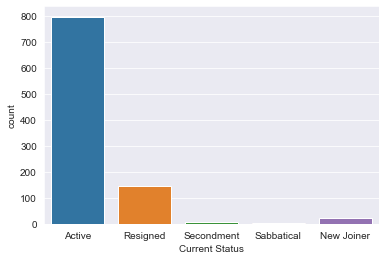

In [42]:
sns.countplot(df2['Current Status'])

In [43]:
df2.loc[df2['Termination Date']>'2018-03-31','Employee Category'] = 'Active'
df2.loc[df2['Termination Date']>'2018-03-31','Current Status'] = 'Active'
df2.loc[df2['Termination Date']>'2018-03-31','Termination Date'] = np.nan

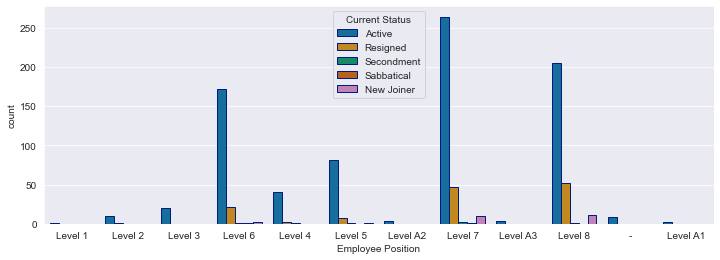

In [44]:
#Show the number of employees that left and stayed by position
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Employee Position', hue='Current Status', data = df2, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [45]:
df2.groupby(["Employee Position","Current Status"]).size()

Employee Position  Current Status
-                  Active              9
Level 1            Active              1
Level 2            Active             10
                   Resigned            1
Level 3            Active             20
Level 4            Active             40
                   Resigned            2
                   Secondment          1
Level 5            Active             81
                   New Joiner          1
                   Resigned            7
                   Secondment          1
Level 6            Active            172
                   New Joiner          2
                   Resigned           22
                   Sabbatical          1
                   Secondment          1
Level 7            Active            264
                   New Joiner         10
                   Resigned           47
                   Sabbatical          1
                   Secondment          2
Level 8            Active            205
                   New 

In [46]:
df2.groupby(["Profit Center","Current Status"]).size()

Profit Center  Current Status
PC - 1         Active            222
               New Joiner          6
               Resigned           33
               Sabbatical          1
               Secondment          2
PC - 11        Active              1
PC - 2         Active            263
               New Joiner          3
               Resigned           37
               Secondment          3
PC - 3         Active            324
               New Joiner         15
               Resigned           53
               Sabbatical          1
               Secondment          1
PC - 5         Resigned            6
PC - 6         Resigned            2
dtype: int64

In [47]:
df2.groupby(["People Group","Current Status"]).size()

People Group          Current Status
Client Service Staff  Active            801
                      New Joiner         24
                      Resigned          130
                      Sabbatical          2
                      Secondment          6
Support Staff         Active              9
                      Resigned            1
dtype: int64

In [48]:
df2.groupby(["Employee Location","Current Status"]).size()

Employee Location  Current Status
Location 1         Active            258
                   New Joiner         13
                   Resigned           39
                   Secondment          1
Location 2         Active             29
                   New Joiner          1
                   Resigned            8
Location 3         Active            172
                   New Joiner          4
                   Resigned           32
                   Sabbatical          1
                   Secondment          2
Location 4         Active             30
                   New Joiner          1
                   Resigned            8
                   Sabbatical          1
Location 5         Active              7
                   Resigned            1
Location 6         Active              5
                   Resigned            1
Location 7         Active            218
                   New Joiner          2
                   Resigned           32
                   Seco

In [49]:
df2.groupby(["Employee Category","Current Status"]).size()

Employee Category                    Current Status
Active                               Active             14
Awaiting Termination                 Active              2
Confirmed Staff                      Active            677
Confirmed Staff (Part-Time 4 Hours)  Active              1
Confirmed Staff (Part-Time 6 Hours)  Active              2
Confirmed-Sabbatical                 Sabbatical          2
Fixed term Staff                     Active              2
Resigned                             Resigned          131
SVP/VP                               Active              9
Secondee-Outward-Without Pay         Secondment          6
Serving Notice Period                Active             31
Staff on Probation                   Active             72
                                     New Joiner         24
dtype: int64

In [50]:
tenure = pd.to_datetime('2018-04-01')
resigned = pd.to_datetime('2017-04-01')

df2['date'] = df2['Termination Date'].copy()
df2['date'] = df2['date'].replace(np.nan,tenure)

# to get year wise data 
df2['year_identifier'] = pd.DatetimeIndex(df2['date']).year

df2['months'] = (df2['date'] - df2['Join Date'])/np.timedelta64(1,'M')
df2.loc[df2['date']!=tenure,'months'] = (df2['date']-resigned)/np.timedelta64(1,'M')
df2['months'] = round(df2['months'],0)
df2.loc[df2['months']==0,'months'] = 1

# Tenure in year
df2['tenure_year'] = df2['months'].copy()
df2['tenure_year'] = round(df2['tenure_year']/12,1)

# for cal of utilization of 1 year
df2.loc[df2['months']>12,'months'] = 12


cols = ['Total Hours','Total Available Hours','Work Hours','Leave Hours','Training Hours','BD Hours','NC Hours']


df2.drop('Termination Date',axis=1,inplace=True)


df2.loc[df2['Current Status']=='Resigned','y'] = 1
df2.loc[df2['Current Status']!='Resigned','y'] = 0


df2['y'] = df2['y'].astype('int64')


df2['Utilization%'] = round((df2['Work Hours']/df2['Total Available Hours'])*100,2)

In [51]:
df2[df2['Employee No']==19]

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,date,year_identifier,months,tenure_year,y,Utilization%
14,19,PC - 3,Cordey Sofia,Level 3,Location 1,Client Service Staff,Active,Cacilia Aimee,2006-05-31,Active,2080,1812.0,77.5,268,0.0,0.0,2030.0,2018-04-01,2018,12.0,11.8,0,4.28


In [52]:
df2.dtypes

Employee No                       int64
Profit Center                    object
Employee Name                    object
Employee Position                object
Employee Location                object
People Group                     object
Employee Category                object
Supervisor name                  object
Join Date                datetime64[ns]
Current Status                   object
Total Hours                       int64
Total Available Hours           float64
Work Hours                      float64
Leave Hours                       int64
Training Hours                  float64
BD Hours                        float64
NC Hours                        float64
date                     datetime64[ns]
year_identifier                   int64
months                          float64
tenure_year                     float64
y                                 int64
Utilization%                    float64
dtype: object

In [53]:
df1.columns

Index(['Employee No', 'Profit Center', 'Employee Name', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Join Date', 'Current Status', 'Total Hours',
       'Total Available Hours', 'Work Hours', 'Leave Hours', 'Training Hours',
       'BD Hours', 'NC Hours', 'date', 'year_identifier', 'months',
       'tenure_year', 'y', 'Utilization%'],
      dtype='object')

In [54]:
#cols1 = ['Employee No','Join Date','Total Hours_pm', 'Total Available Hours_pm', 'Work Hours_pm',
#'Leave Hours_pm', 'Training Hours_pm', 'BD Hours_pm', 'NC Hours_pm','Utilization%_pm','Current Status','y']

In [55]:
df1.sample(3)

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,date,year_identifier,months,tenure_year,y,Utilization%
217,218,PC - 1,Valerie Cathy,Level 6,Location 3,Client Service Staff,Confirmed Staff,Cynthia Leonora,2013-12-31,Active,2088,866.34,448.0,1216.0,5.66,0.0,418.34,2017-04-01,2017,12.0,3.2,0,51.71
495,496,PC - 2,Pet Melisse,Level 7,Location 7,Client Service Staff,Serving Notice Period,Dorotea Inger,2015-12-31,Resigned,1280,1103.00,825.0,176.0,1.00,31.0,256.00,2016-11-30,2016,8.0,0.7,1,74.80
709,710,PC - 7,Loella Constancia,Level 8,Location 6,Client Service Staff,Confirmed Staff,Bernice Andrea,2016-08-31,Active,1280,793.00,286.0,459.0,28.00,0.0,515.00,2017-04-01,2017,7.0,0.6,0,36.07


In [56]:
df2.sample(4)

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,date,year_identifier,months,tenure_year,y,Utilization%
350,447,PC - 3,Nadine Estrella,Level 4,Location 4,Client Service Staff,Resigned,Kalindi Toma,2015-08-31,Resigned,352,336.0,304.0,16,0.0,0.0,40.0,2017-06-30,2017,3.0,0.2,1,90.48
417,525,PC - 1,Faunie Amil,Level 6,Location 3,Client Service Staff,Confirmed Staff,Trudey Lissi,2016-01-31,Active,2080,1901.5,1704.0,172,6.5,16.0,431.5,2018-04-01,2018,12.0,2.2,0,89.61
490,607,PC - 2,Kaylyn Carlene,Level 8,Location 7,Client Service Staff,Confirmed Staff,Laetitia Yoshi,2016-05-31,Active,2080,1848.0,1832.0,232,0.0,0.0,16.0,2018-04-01,2018,12.0,1.8,0,99.13
179,228,PC - 3,Kassandra Ki,Level 6,Location 1,Client Service Staff,Confirmed Staff,Willette Lil,2014-02-28,Active,2080,1847.5,2048.0,216,16.5,0.0,150.0,2018-04-01,2018,12.0,4.1,0,110.85


In [57]:
df1.shape

(789, 23)

In [58]:
df2.shape

(973, 23)

In [59]:
df3 = pd.merge(df1,df2,how='outer',on='Employee No')

In [60]:
df3.sample(3)

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y
859,859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 2,Adrian Clayton,Level 7,Location 7,Client Service Staff,Confirmed Staff,Libby Bowen,2017-05-31,Active,1800.0,1570.0,1446.0,176.0,54.0,0.0,327.0,2018-04-01,2018.0,10.0,0.8,0.0,92.1
89,90,PC - 1,Sibel Wrennie,Level 5,Location 3,Client Service Staff,Serving Notice Period,Rina Debee,2011-06-30,Resigned,2088.0,600.0,0.0,1488.0,0.0,600.0,0.0,2017-04-30,2017.0,12.0,1.1,1.0,0.00,PC - 1,Sibel Wrennie,Level 5,Location 3,Client Service Staff,Resigned,Rina Debee,2011-06-30,Resigned,144.0,0.0,0.0,144.0,0.0,0.0,16.0,2017-04-30,2017.0,1.0,0.1,1.0,NaN
761,762,PC - 2,Kacey Lida,Level 8,Location 9,Client Service Staff,Staff on Probation,Lenora Nydia,2017-02-28,Active,240.0,196.0,180.0,16.0,28.0,0.0,16.0,2017-04-01,2017.0,1.0,0.1,0.0,91.84,PC - 2,Kacey Lida,Level 8,Location 9,Client Service Staff,Confirmed Staff,Lenora Nydia,2017-02-28,Active,2080.0,1770.5,1770.5,264.0,45.5,0.0,21.0,2018-04-01,2018.0,12.0,1.1,0.0,100.0


In [61]:
df3.shape

(1111, 45)

In [62]:
issue = df3[(df3['Current Status_x']=='Active') & (df3['Current Status_y'].isnull())]
issue

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,2017-04-01,2017.0,12.0,18.8,0.0,12.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
247,248,PC - 8,Wynnie Lilas,Level 6,Location 7,Client Service Staff,Confirmed Staff,Aeriela Elonore,2014-06-30,Active,1392.0,1288.0,504.0,104.0,0.0,0.0,792.0,2017-04-01,2017.0,12.0,2.8,0.0,39.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
432,433,PC - 9,Nanete Kandace,Level 5,Location 3,Client Service Staff,Serving Notice Period,Agata Theodosia,2015-07-31,Active,0.0,0.0,0.0,0.0,0.0,168.0,0.0,2017-04-01,2017.0,12.0,1.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [63]:
df2.loc[df2['Utilization%'].isnull(),'Utilization%'] = 0.0

In [64]:
issue1 = df3[(df3['y_x']==0) & (df3['y_y'].isnull())]
issue1

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,2017-04-01,2017.0,12.0,18.8,0.0,12.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
61,62,PC - 3,Madella Ann-Marie,Level 6,Location 4,Client Service Staff,Secondee-Outward-Without Pay,Oriana Tabby,2010-10-31,Secondment,1056.0,816.0,492.0,224.0,16.0,0.0,372.0,2017-04-01,2017.0,12.0,6.4,0.0,60.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
95,96,PC - 2,Jayme Linzy,Level 6,Location 7,Client Service Staff,Secondee-Outward-Without Pay,Sile Lorrie,2011-09-30,Secondment,1200.0,1080.0,904.0,120.0,0.0,0.0,184.0,2017-04-01,2017.0,12.0,5.5,0.0,83.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
212,213,PC - 3,Brit Karoline,Level 6,Location 2,Client Service Staff,Secondee-Outward-Without Pay,Kynthia Hildy,2013-11-30,Secondment,688.0,619.5,152.0,64.0,4.5,0.0,467.5,2017-04-01,2017.0,12.0,3.3,0.0,24.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
247,248,PC - 8,Wynnie Lilas,Level 6,Location 7,Client Service Staff,Confirmed Staff,Aeriela Elonore,2014-06-30,Active,1392.0,1288.0,504.0,104.0,0.0,0.0,792.0,2017-04-01,2017.0,12.0,2.8,0.0,39.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
432,433,PC - 9,Nanete Kandace,Level 5,Location 3,Client Service Staff,Serving Notice Period,Agata Theodosia,2015-07-31,Active,0.0,0.0,0.0,0.0,0.0,168.0,0.0,2017-04-01,2017.0,12.0,1.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [65]:
index = [4,61,95,212,247,432]
df3.drop(index=index,inplace=True)

In [66]:
df3.sample(5)

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y
238,239,PC - 3,Velvet Mariana,Level 7,Location 1,Client Service Staff,Confirmed Staff,Nanine Prudy,2014-06-30,Active,2088.0,1802.5,1757.50,256.0,29.5,0.0,173.5,2017-04-01,2017.0,12.0,2.8,0.0,97.50,PC - 3,Velvet Mariana,Level 7,Location 1,Client Service Staff,Secondee-Outward-Without Pay,Ophelie Jyoti,2014-06-30,Secondment,1840.0,1569.5,1583.0,248.0,22.5,0.0,8.0,2018-04-01,2018.0,12.0,3.8,0.0,100.86
1090,1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Mercedes Horn,Level 8,Location 1,Client Service Staff,Staff on Probation,Kali Gwendolyn,2018-03-31,New Joiner,160.0,152.0,0.0,0.0,8.0,0.0,152.0,2018-04-01,2018.0,1.0,0.1,0.0,0.00
39,40,PC - 1,Nerissa Jackquelin,Level 5,Location 3,Client Service Staff,Confirmed Staff,Jordanna Danya,2009-06-30,Active,2088.0,1864.0,1303.43,224.0,0.0,0.0,1062.5,2017-04-01,2017.0,12.0,7.8,0.0,69.93,PC - 1,Nerissa Jackquelin,Level 5,Location 3,Client Service Staff,Confirmed Staff,Ardys Katerine,2009-06-30,Active,2080.0,1784.0,672.6,272.0,24.0,0.0,1121.0,2018-04-01,2018.0,12.0,8.8,0.0,37.70
520,521,PC - 3,Bertie Kailey,Level 8,Location 2,Client Service Staff,Confirmed Staff,Cristina Maren,2016-01-31,Active,2088.0,1858.0,1751.00,168.0,62.0,0.0,319.5,2017-04-01,2017.0,12.0,1.2,0.0,94.24,PC - 3,Bertie Kailey,Level 8,Location 2,Client Service Staff,Confirmed Staff,Moira Vivien,2016-01-31,Active,2080.0,1820.0,1480.0,200.0,60.0,0.0,397.0,2018-04-01,2018.0,12.0,2.2,0.0,81.32
915,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 2,Carleigh Osborn,Level 8,Location 7,Client Service Staff,Serving Notice Period,Tatiana Roxanna,2017-06-30,Active,1640.0,1335.5,1072.0,216.0,88.5,0.0,277.5,2018-04-01,2018.0,9.0,0.8,0.0,80.27


In [67]:
# Employees who have joined before 2016-04-01, not available in 2016-17 but available in 2017-18 
py_missing = df3[(df3['Utilization%_x'].isnull()) & (df3['Join Date_y']<='2016-04-01')]
py_missing

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y
789,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Vanessa Zingaro,Level 5,Location 1,Client Service Staff,Confirmed Staff,Zaria Dawn,2011-04-30,Active,1736.0,1553.0,934.0,144.0,39.0,0.0,626.0,2018-04-01,2018.0,12.0,6.9,0.0,60.14
790,791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Refugia Morganti,Level 5,Location 1,Client Service Staff,Confirmed Staff,Guenevere Florida,2012-09-30,Active,520.0,480.0,0.0,40.0,0.0,0.0,480.0,2018-04-01,2018.0,12.0,5.5,0.0,0.00
791,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Angelita Arzu,Level 6,Location 1,Client Service Staff,Confirmed Staff,Orsa Margeaux,2013-06-30,Active,680.0,680.0,690.0,0.0,0.0,0.0,0.0,2018-04-01,2018.0,12.0,4.8,0.0,101.47
792,793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Bess Sun,Level 6,Location 1,Client Service Staff,Confirmed Staff,Rosalynd Catina,2013-07-31,Active,336.0,320.0,272.0,8.0,8.0,0.0,160.0,2018-04-01,2018.0,12.0,4.7,0.0,85.00
793,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 2,Rosanne Laster,Level 7,Location 7,Client Service Staff,Confirmed Staff,Myrtie Brana,2014-03-31,Active,688.0,653.0,445.0,32.0,3.0,0.0,0.0,2018-04-01,2018.0,12.0,4.0,0.0,68.15
794,795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Dominic Kopczynski,Level 7,Location 1,Client Service Staff,Confirmed Staff,Vonni Bethena,2014-09-30,Active,1040.0,779.5,655.5,256.0,4.5,0.0,128.0,2018-04-01,2018.0,12.0,3.5,0.0,84.09
795,796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Eileen Gunn,Level 6,Location 1,Client Service Staff,Confirmed Staff,Hedi Elna,2015-08-31,Active,1560.0,1376.0,1068.0,184.0,0.0,0.0,500.0,2018-04-01,2018.0,12.0,2.6,0.0,77.62
796,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Lani Rubalcaba,Level 7,Location 1,Client Service Staff,Confirmed Staff,Lane Ailina,2016-01-31,Active,680.0,592.0,552.0,88.0,0.0,0.0,40.0,2018-04-01,2018.0,12.0,2.2,0.0,93.24


In [68]:
index = list(range(789,797,1))
df3.drop(index=index,inplace=True)

In [69]:
xcols = ['Total Hours_x','Total Available Hours_x','Work Hours_x','Leave Hours_x','Training Hours_x','BD Hours_x','NC Hours_x']
ycols = ['Total Hours_y','Total Available Hours_y','Work Hours_y','Leave Hours_y','Training Hours_y','BD Hours_y','NC Hours_y']
cols = ['Total Hours','Total Available Hours','Work Hours','Leave Hours','Training Hours','BD Hours','NC Hours']

In [70]:
len(cols)

7

In [71]:
df3.shape

(1097, 45)

In [72]:
df3

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,2017-04-01,2017.0,12.0,16.5,0.0,35.29,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,2018-04-01,2018.0,12.0,17.5,0.0,24.03
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,2017-04-01,2017.0,12.0,17.8,0.0,29.52,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,2018-04-01,2018.0,12.0,18.8,0.0,38.65
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,2017-04-01,2017.0,12.0,16.2,0.0,52.91,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,2001-01-31,Active,2080.0,1720.0,1173.0,338.0,22.0,463.5,357.5,2018-04-01,2018.0,12.0,17.2,0.0,68.20
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,2017-04-01,2017.0,12.0,16.5,0.0,14.75,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2000-09-30,Resigned,1840.0,1640.5,273.0,196.0,3.5,1361.0,24.0,2018-02-28,2018.0,11.0,0.9,1.0,16.64
5,6,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2002-06-30,Active,2088.0,1823.0,471.0,260.0,5.0,1420.0,261.0,2017-04-01,2017.0,12.0,14.8,0.0,25.84,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2002-06-30,Active,2080.0,1812.0,428.0,260.0,8.0,1237.0,470.0,2018-04-01,2018.0,12.0,15.8,0.0,23.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Brock Walsh,Level 8,Location 3,Client Service Staff,Staff on Probation,Gavra Kayle,2018-03-31,New Joiner,80.0,-40.0,0.0,0.0,120.0,0.0,0.0,2018-04-01,2018.0,1.0,0.1,0.0,-0.00
1107,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Britteny Rosamund,Level 7,Location 3,Client Service Staff,Staff on Probation,Lee Alfie,2018-03-31,New Joiner,40.0,24.0,0.0,8.0,8.0,0.0,24.0,2018-04-01,2018.0,1.0,0.1,0.0,0.00
1108,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Caiden Romero,Level 8,Location 1,Client Service Staff,Staff on Probation,Donette Verne,2018-03-31,New Joiner,40.0,9.0,0.0,8.0,23.0,0.0,9.0,2018-04-01,2018.0,1.0,0.1,0.0,0.00
1109,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Andy Mejia,Level 7,Location 1,Client Service Staff,Staff on Probation,Tiena Hatti,2018-03-31,New Joiner,40.0,0.0,0.0,8.0,32.0,0.0,0.0,2018-04-01,2018.0,1.0,0.1,0.0,NaN


In [73]:
xcols

['Total Hours_x',
 'Total Available Hours_x',
 'Work Hours_x',
 'Leave Hours_x',
 'Training Hours_x',
 'BD Hours_x',
 'NC Hours_x']

In [74]:
df3[(df3['Utilization%_x'].isnull())]

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y
797,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Bell Stoffel,Level 7,Location 1,Client Service Staff,Confirmed Staff,Landon Browning,2016-04-30,Active,1920.0,1696.0,1758.0,224.0,0.0,0.0,36.0,2018-04-01,2018.0,12.0,1.9,0.0,103.66
798,799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Mickey Cid,Level 8,Location 3,Client Service Staff,Resigned,Luciana Erika,2017-04-30,Resigned,536.0,511.0,312.0,8.0,17.0,0.0,229.0,2017-07-31,2017.0,4.0,0.3,1.0,61.06
799,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 2,Lashay Dieterich,Level 7,Location 7,Client Service Staff,Confirmed Staff,Kati Rosalyn,2017-04-30,Active,2080.0,1784.5,1340.0,184.0,111.5,0.0,704.0,2018-04-01,2018.0,11.0,0.9,0.0,75.09
800,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 2,Young Castellon,Level 7,Location 7,Client Service Staff,Confirmed Staff,Naomi Rebekah,2017-04-30,Active,2080.0,1729.5,1544.0,232.0,118.5,120.0,236.0,2018-04-01,2018.0,11.0,0.9,0.0,89.27
801,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 2,Florine Sassman,Level 7,Location 7,Client Service Staff,Confirmed Staff,Naomi Rebekah,2017-04-30,Active,2080.0,1732.5,1516.0,216.0,131.5,104.0,262.0,2018-04-01,2018.0,11.0,0.9,0.0,87.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Brock Walsh,Level 8,Location 3,Client Service Staff,Staff on Probation,Gavra Kayle,2018-03-31,New Joiner,80.0,-40.0,0.0,0.0,120.0,0.0,0.0,2018-04-01,2018.0,1.0,0.1,0.0,-0.00
1107,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Britteny Rosamund,Level 7,Location 3,Client Service Staff,Staff on Probation,Lee Alfie,2018-03-31,New Joiner,40.0,24.0,0.0,8.0,8.0,0.0,24.0,2018-04-01,2018.0,1.0,0.1,0.0,0.00
1108,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Caiden Romero,Level 8,Location 1,Client Service Staff,Staff on Probation,Donette Verne,2018-03-31,New Joiner,40.0,9.0,0.0,8.0,23.0,0.0,9.0,2018-04-01,2018.0,1.0,0.1,0.0,0.00
1109,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Andy Mejia,Level 7,Location 1,Client Service Staff,Staff on Probation,Tiena Hatti,2018-03-31,New Joiner,40.0,0.0,0.0,8.0,32.0,0.0,0.0,2018-04-01,2018.0,1.0,0.1,0.0,NaN


In [75]:
#insert column from termination sheet with nan values 
for col in cols:
    df3[col] = np.nan

In [76]:
df3.tail()

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
1106,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Brock Walsh,Level 8,Location 3,Client Service Staff,Staff on Probation,Gavra Kayle,2018-03-31,New Joiner,80.0,-40.0,0.0,0.0,120.0,0.0,0.0,2018-04-01,2018.0,1.0,0.1,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Britteny Rosamund,Level 7,Location 3,Client Service Staff,Staff on Probation,Lee Alfie,2018-03-31,New Joiner,40.0,24.0,0.0,8.0,8.0,0.0,24.0,2018-04-01,2018.0,1.0,0.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Caiden Romero,Level 8,Location 1,Client Service Staff,Staff on Probation,Donette Verne,2018-03-31,New Joiner,40.0,9.0,0.0,8.0,23.0,0.0,9.0,2018-04-01,2018.0,1.0,0.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Andy Mejia,Level 7,Location 1,Client Service Staff,Staff on Probation,Tiena Hatti,2018-03-31,New Joiner,40.0,0.0,0.0,8.0,32.0,0.0,0.0,2018-04-01,2018.0,1.0,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 2,Alondra Pugh,Level 8,Location 7,Client Service Staff,Staff on Probation,Frances Mignonne,2018-03-31,New Joiner,40.0,20.0,0.0,8.0,12.0,0.0,20.0,2018-04-01,2018.0,1.0,0.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df3['Join Date']  = df3['Join Date_y'].copy()

In [78]:
df3.drop('Join Date_x',axis=1,inplace=True)
df3.drop('Join Date_y',axis=1,inplace=True)

In [79]:
df3.head()

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,2017-04-01,2017.0,12.0,16.5,0.0,35.29,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,2018-04-01,2018.0,12.0,17.5,0.0,24.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-30
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,2017-04-01,2017.0,12.0,17.8,0.0,29.52,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,2018-04-01,2018.0,12.0,18.8,0.0,38.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-05-31
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,2017-04-01,2017.0,12.0,16.2,0.0,52.91,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1720.0,1173.0,338.0,22.0,463.5,357.5,2018-04-01,2018.0,12.0,17.2,0.0,68.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-31
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,2017-04-01,2017.0,12.0,16.5,0.0,14.75,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,Resigned,1840.0,1640.5,273.0,196.0,3.5,1361.0,24.0,2018-02-28,2018.0,11.0,0.9,1.0,16.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-30
5,6,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1823.0,471.0,260.0,5.0,1420.0,261.0,2017-04-01,2017.0,12.0,14.8,0.0,25.84,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1812.0,428.0,260.0,8.0,1237.0,470.0,2018-04-01,2018.0,12.0,15.8,0.0,23.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-06-30


In [80]:
ycols

['Total Hours_y',
 'Total Available Hours_y',
 'Work Hours_y',
 'Leave Hours_y',
 'Training Hours_y',
 'BD Hours_y',
 'NC Hours_y']

In [81]:
#df5.loc[(df5['Utilization%_pm_x'].notnull()),'Total Hours'] = round((df5['Total Hours_pm_x']+df5['Total Hours_pm_y'])/2,2)

In [82]:
for x,y,c in zip(xcols,ycols,cols):
    df3.loc[df3['Employee No'].notnull(),c] = round((df3[x] + df3[y])/2,2)

In [83]:
a = df3[df3['Utilization%_x'].notnull()]

In [84]:
a.sample(5)

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
551,552,PC - 5,Tish Regan,Level 8,Location 7,Client Service Staff,Confirmed Staff,Hedwiga Mehetabel,Active,2088.0,1835.0,1400.0,184.0,69.0,0.0,467.5,2017-04-01,2017.0,12.0,1.0,0.0,76.29,PC - 2,Tish Regan,Level 7,Location 7,Client Service Staff,Confirmed Staff,Rosabella Arlina,Active,2080.0,1791.0,1806.5,284.0,5.0,0.0,38.0,2018-04-01,2018.0,12.0,2.0,0.0,100.87,2084.0,1813.00,1603.25,234.0,37.00,0.0,252.75,2016-03-31
352,353,PC - 3,Tonya Averyl,Level 7,Location 2,Client Service Staff,Confirmed Staff,Marney Anderea,Active,2088.0,1884.5,1792.0,200.0,3.5,0.0,168.5,2017-04-01,2017.0,12.0,1.9,0.0,95.09,PC - 3,Tonya Averyl,Level 6,Location 2,Client Service Staff,Confirmed Staff,Marney Anderea,Active,2080.0,1800.0,1672.0,256.0,24.0,0.0,128.0,2018-04-01,2018.0,12.0,2.9,0.0,92.89,2084.0,1842.25,1732.00,228.0,13.75,0.0,148.25,2015-04-30
610,611,PC - 3,Yevette Analiese,Level 7,Location 4,Client Service Staff,Confirmed Staff,Hedi Elna,Active,1840.0,1579.5,819.0,240.0,20.5,0.0,840.5,2017-04-01,2017.0,10.0,0.8,0.0,51.85,PC - 3,Yevette Analiese,Level 7,Location 4,Client Service Staff,Serving Notice Period,Hedi Elna,Active,2080.0,1762.5,1039.0,292.0,25.5,0.0,786.5,2018-04-01,2018.0,12.0,1.8,0.0,58.95,1960.0,1671.00,929.00,266.0,23.00,0.0,813.50,2016-05-31
256,257,PC - 3,Fleur Wallis,Level 7,Location 1,Client Service Staff,Confirmed Staff,Dottie Bidget,Active,2088.0,1964.0,1510.0,120.0,4.0,0.0,328.0,2017-04-01,2017.0,12.0,2.8,0.0,76.88,PC - 3,Fleur Wallis,Level 7,Location 1,Client Service Staff,Confirmed Staff,Dottie Bidget,Active,2080.0,1840.0,1764.0,224.0,16.0,0.0,296.0,2018-04-01,2018.0,12.0,3.8,0.0,95.87,2084.0,1902.00,1637.00,172.0,10.00,0.0,312.00,2014-06-30
554,555,PC - 3,Liz Juanita,Level 7,Location 2,Client Service Staff,Confirmed Staff,Cristina Maren,Active,2088.0,1734.5,1485.0,297.0,56.5,0.0,496.0,2017-04-01,2017.0,12.0,1.0,0.0,85.62,PC - 3,Liz Juanita,Level 7,Location 2,Client Service Staff,Resigned,-,Resigned,992.0,854.0,-42.0,112.0,26.0,0.0,893.5,2017-09-30,2017.0,6.0,0.5,1.0,-4.92,1540.0,1294.25,721.50,204.5,41.25,0.0,694.75,2016-03-31


In [85]:
df3.loc[(df3['Work Hours_y']==0) & (df3['Utilization%_y'].isnull()),'Utilization%_y'] = 0

In [86]:
df3

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,2017-04-01,2017.0,12.0,16.5,0.0,35.29,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,2018-04-01,2018.0,12.0,17.5,0.0,24.03,2084.0,1833.25,542.00,202.0,48.75,1311.75,37.00,2000-09-30
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,2017-04-01,2017.0,12.0,17.8,0.0,29.52,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,2018-04-01,2018.0,12.0,18.8,0.0,38.65,2084.0,1875.00,638.75,182.0,27.00,647.25,665.25,1999-05-31
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,2017-04-01,2017.0,12.0,16.2,0.0,52.91,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1720.0,1173.0,338.0,22.0,463.5,357.5,2018-04-01,2018.0,12.0,17.2,0.0,68.20,2084.0,1809.25,1088.75,241.0,33.75,485.25,453.50,2001-01-31
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,2017-04-01,2017.0,12.0,16.5,0.0,14.75,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,Resigned,1840.0,1640.5,273.0,196.0,3.5,1361.0,24.0,2018-02-28,2018.0,11.0,0.9,1.0,16.64,1964.0,1745.75,273.00,202.0,16.25,1371.50,139.50,2000-09-30
5,6,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1823.0,471.0,260.0,5.0,1420.0,261.0,2017-04-01,2017.0,12.0,14.8,0.0,25.84,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1812.0,428.0,260.0,8.0,1237.0,470.0,2018-04-01,2018.0,12.0,15.8,0.0,23.62,2084.0,1817.50,449.50,260.0,6.50,1328.50,365.50,2002-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Brock Walsh,Level 8,Location 3,Client Service Staff,Staff on Probation,Gavra Kayle,New Joiner,80.0,-40.0,0.0,0.0,120.0,0.0,0.0,2018-04-01,2018.0,1.0,0.1,0.0,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31
1107,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Britteny Rosamund,Level 7,Location 3,Client Service Staff,Staff on Probation,Lee Alfie,New Joiner,40.0,24.0,0.0,8.0,8.0,0.0,24.0,2018-04-01,2018.0,1.0,0.1,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31
1108,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Caiden Romero,Level 8,Location 1,Client Service Staff,Staff on Probation,Donette Verne,New Joiner,40.0,9.0,0.0,8.0,23.0,0.0,9.0,2018-04-01,2018.0,1.0,0.1,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31
1109,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [87]:
index = [1103,1104,1105,1106]
df3.drop(index=index,inplace=True)

In [88]:
df3.sample()

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
289,290,PC - 5,Marj Kip,Level 8,Location 1,Client Service Staff,Serving Notice Period,Guenevere Florida,Resigned,368.0,368.0,368.0,0.0,0.0,0.0,0.0,2016-06-30,2016.0,3.0,0.2,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [89]:
#df3.isnull().sum()

In [90]:
df3.loc[(df3['Work Hours_x']==0) & (df3['Utilization%_x'].isnull()),'Utilization%_y'] = 0

In [91]:
df3

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Current Status_x,Total Hours_x,Total Available Hours_x,Work Hours_x,Leave Hours_x,Training Hours_x,BD Hours_x,NC Hours_x,date_x,year_identifier_x,months_x,tenure_year_x,y_x,Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Current Status_y,Total Hours_y,Total Available Hours_y,Work Hours_y,Leave Hours_y,Training Hours_y,BD Hours_y,NC Hours_y,date_y,year_identifier_y,months_y,tenure_year_y,y_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,2017-04-01,2017.0,12.0,16.5,0.0,35.29,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,2018-04-01,2018.0,12.0,17.5,0.0,24.03,2084.0,1833.25,542.00,202.0,48.75,1311.75,37.00,2000-09-30
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,2017-04-01,2017.0,12.0,17.8,0.0,29.52,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,2018-04-01,2018.0,12.0,18.8,0.0,38.65,2084.0,1875.00,638.75,182.0,27.00,647.25,665.25,1999-05-31
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,2017-04-01,2017.0,12.0,16.2,0.0,52.91,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1720.0,1173.0,338.0,22.0,463.5,357.5,2018-04-01,2018.0,12.0,17.2,0.0,68.20,2084.0,1809.25,1088.75,241.0,33.75,485.25,453.50,2001-01-31
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,2017-04-01,2017.0,12.0,16.5,0.0,14.75,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,Resigned,1840.0,1640.5,273.0,196.0,3.5,1361.0,24.0,2018-02-28,2018.0,11.0,0.9,1.0,16.64,1964.0,1745.75,273.00,202.0,16.25,1371.50,139.50,2000-09-30
5,6,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,Active,2088.0,1823.0,471.0,260.0,5.0,1420.0,261.0,2017-04-01,2017.0,12.0,14.8,0.0,25.84,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,Active,2080.0,1812.0,428.0,260.0,8.0,1237.0,470.0,2018-04-01,2018.0,12.0,15.8,0.0,23.62,2084.0,1817.50,449.50,260.0,6.50,1328.50,365.50,2002-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Armando Browning,Level 8,Location 8,Client Service Staff,Staff on Probation,Douglas Herrera,New Joiner,80.0,58.0,30.0,8.0,14.0,0.0,28.0,2018-04-01,2018.0,1.0,0.1,0.0,51.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31
1107,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 1,Britteny Rosamund,Level 7,Location 3,Client Service Staff,Staff on Probation,Lee Alfie,New Joiner,40.0,24.0,0.0,8.0,8.0,0.0,24.0,2018-04-01,2018.0,1.0,0.1,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31
1108,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,PC - 3,Caiden Romero,Level 8,Location 1,Client Service Staff,Staff on Probation,Donette Verne,New Joiner,40.0,9.0,0.0,8.0,23.0,0.0,9.0,2018-04-01,2018.0,1.0,0.1,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31
1109,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [92]:
index = [1102,1107,1108,1109,1110]
df3.drop(index=index,inplace=True)

In [93]:
df3.shape

(1088, 51)

In [94]:
#df3.isnull().sum()

In [95]:
#df3.columns

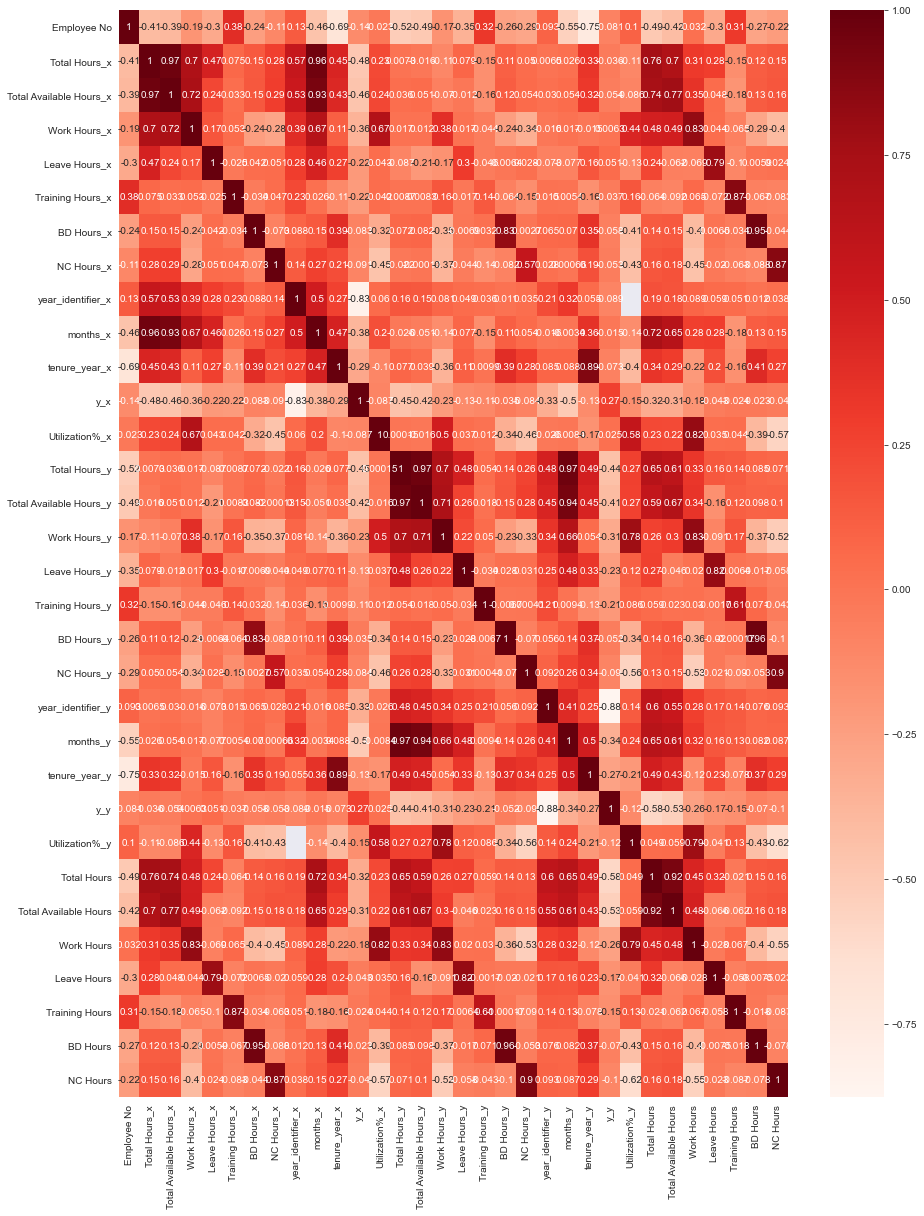

In [96]:
#Using Pearson Correlation
plt.figure(figsize=(15,20))
cor = df3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The above result shows all independent variables are slightly correlated with target variable. 
##But independent variables have multicolinearity. For example: "total hours" is highly correlated with "total available hours".

In [97]:
#Correlation with output variable
cor_target = abs(cor["y_x"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

year_identifier_x    0.825818
y_x                  1.000000
months_y             0.502654
Name: y_x, dtype: float64

In [98]:
#Correlation with output variable
cor_target = abs(cor["y_y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

year_identifier_y        0.876950
y_y                      1.000000
Total Hours              0.581814
Total Available Hours    0.532509
Name: y_y, dtype: float64

In [99]:
df3.columns

Index(['Employee No', 'Profit Center_x', 'Employee Name_x',
       'Employee Position_x', 'Employee Location_x', 'People Group_x',
       'Employee Category_x', 'Supervisor name_x', 'Current Status_x',
       'Total Hours_x', 'Total Available Hours_x', 'Work Hours_x',
       'Leave Hours_x', 'Training Hours_x', 'BD Hours_x', 'NC Hours_x',
       'date_x', 'year_identifier_x', 'months_x', 'tenure_year_x', 'y_x',
       'Utilization%_x', 'Profit Center_y', 'Employee Name_y',
       'Employee Position_y', 'Employee Location_y', 'People Group_y',
       'Employee Category_y', 'Supervisor name_y', 'Current Status_y',
       'Total Hours_y', 'Total Available Hours_y', 'Work Hours_y',
       'Leave Hours_y', 'Training Hours_y', 'BD Hours_y', 'NC Hours_y',
       'date_y', 'year_identifier_y', 'months_y', 'tenure_year_y', 'y_y',
       'Utilization%_y', 'Total Hours', 'Total Available Hours', 'Work Hours',
       'Leave Hours', 'Training Hours', 'BD Hours', 'NC Hours', 'Join Date'],
      dtyp

In [100]:
#now I  select only average hours column and 2017-18 categorical features 
cols=['Employee No', 'Profit Center_y', 'Employee Position_y', 'Employee Location_y', 'People Group_y',
       'Employee Category_y', 'tenure_year_y', 'y_y', 'Utilization%_y', 'Total Hours', 'Total Available Hours', 'Work Hours',
       'Leave Hours', 'Training Hours', 'BD Hours', 'NC Hours']
df4 = df3[cols]

In [101]:
df4

,Employee No,Profit Center_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,tenure_year_y,y_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1,PC - 1,Level 1,Location 3,Client Service Staff,SVP/VP,17.5,0.0,24.03,2084.0,1833.25,542.00,202.0,48.75,1311.75,37.00
1,2,PC - 2,Level 2,Location 7,Client Service Staff,SVP/VP,18.8,0.0,38.65,2084.0,1875.00,638.75,182.0,27.00,647.25,665.25
2,3,PC - 2,Level 2,Location 7,Client Service Staff,SVP/VP,17.2,0.0,68.20,2084.0,1809.25,1088.75,241.0,33.75,485.25,453.50
3,4,PC - 3,Level 2,Location 1,Client Service Staff,Resigned,0.9,1.0,16.64,1964.0,1745.75,273.00,202.0,16.25,1371.50,139.50
5,6,PC - 1,Level 2,Location 3,Client Service Staff,SVP/VP,15.8,0.0,23.62,2084.0,1817.50,449.50,260.0,6.50,1328.50,365.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1094,PC - 3,Level 7,Location 1,Client Service Staff,Staff on Probation,0.1,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1098,1095,PC - 2,Level 7,Location 7,Client Service Staff,Active,0.1,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099,1096,PC - 2,Level 8,Location 7,Client Service Staff,Staff on Probation,0.1,0.0,70.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100,1097,PC - 3,Level 7,Location 2,Client Service Staff,Staff on Probation,0.1,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df4[(df4['Employee Position_y']=='Level 1')]

,Employee No,Profit Center_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,tenure_year_y,y_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1,PC - 1,Level 1,Location 3,Client Service Staff,SVP/VP,17.5,0.0,24.03,2084.0,1833.25,542.0,202.0,48.75,1311.75,37.0


In [103]:
df4['Employee Position_y'].value_counts()

Level 7     319
Level 8     263
Level 6     194
Level 5      88
Level 4      43
Level 3      20
Level 2      11
-             9
Level A3      3
Level A2      3
Level A1      2
Level 1       1
Name: Employee Position_y, dtype: int64

Looking for employee position  data, level 1 is highest position and  employee no 1 is highly pramoted 

# Spliting Target Variable

In [104]:
df4.columns!= "y_y"

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True])

In [105]:
predictor= df4.iloc[:, df4.columns != 'y_y'] # X variables
target= df4.iloc[:, df4.columns == 'y_y'] # y variable

In [106]:
#predictor

In [107]:
#target

In [108]:
#df4['y_y'] = df4['y_y'].astype('int64')

In [109]:
#df4.isnull().sum()

# numerical veriables

In [110]:
#to get numerical veriables
#df3.select_dtypes(include=np.number).columns.tolist()
numeric_clmns = predictor.dtypes[predictor.dtypes != "object"].index 
numeric_clmns

Index(['Employee No', 'tenure_year_y', 'Utilization%_y', 'Total Hours',
       'Total Available Hours', 'Work Hours', 'Leave Hours', 'Training Hours',
       'BD Hours', 'NC Hours'],
      dtype='object')

In [111]:
predictor['tenure_year_y'].median()
#df4['Utilization%_y'].median()

1.7

In [112]:
predictor['Employee No'].isnull

<bound method Series.isnull of 0          1
1          2
2          3
3          4
5          6
        ... 
1097    1094
1098    1095
1099    1096
1100    1097
1101    1098
Name: Employee No, Length: 1088, dtype: int64>

In [113]:
predictor['tenure_year_y'].fillna(value=predictor['tenure_year_y'].median(),inplace=True)
predictor['Utilization%_y'].fillna(value=predictor['Utilization%_y'].median(),inplace=True)
predictor['Total Hours'].fillna(value=predictor['Total Hours'].median(),inplace=True)
predictor['Total Available Hours'].fillna(value=predictor['Total Available Hours'].median(),inplace=True)
predictor['Work Hours'].fillna(value=predictor['Work Hours'].median(),inplace=True)
predictor['Leave Hours'].fillna(value=predictor['Leave Hours'].median(),inplace=True)
predictor['Training Hours'].fillna(value=predictor['Training Hours'].median(),inplace=True)
predictor['BD Hours'].fillna(value=predictor['BD Hours'].median(),inplace=True)
predictor['NC Hours'].fillna(value=predictor['NC Hours'].median(),inplace=True)
#predictor['y_y'].fillna(value=df4['y_y'].median(),inplace=True)

C:\Users\sonal\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [114]:
#numeric_clmns.fillna(df4.median(),inplace=True)

# categorical veriables

In [115]:
#to get categorical veriables
#df3.select_dtypes(include=np.number).columns.tolist()
categorical_clmns = predictor.dtypes[predictor.dtypes == "object"].index 
categorical_clmns

Index(['Profit Center_y', 'Employee Position_y', 'Employee Location_y',
       'People Group_y', 'Employee Category_y'],
      dtype='object')

In [116]:
predictor["Profit Center_y"].mode()[0]

'PC - 3'

In [117]:
predictor["Employee Location_y"].mode()[0]

'Location 1'

In [118]:
predictor["People Group_y"].mode()[0]

'Client Service Staff'

In [119]:
predictor["Employee Category_y"].mode()[0]

'Confirmed Staff'

In [120]:
predictor["Employee Position_y"].mode()[0]

'Level 7'

In [121]:
# Imputing missing values for categorical veriables
predictor["Profit Center_y"] = predictor["Profit Center_y"].fillna("PC - 3")
predictor["Employee Location_y"]=predictor["Employee Location_y"].fillna("Location 1")
predictor["People Group_y"]= predictor["People Group_y"].fillna("Client Service Staff")
predictor["Employee Category_y"]= predictor["Employee Category_y"].fillna("Confirmed Staff")
predictor["Employee Position_y"]= predictor["Employee Position_y"].fillna("Level 7")

<ipython-input-121-88f9d2e7a8e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor["Profit Center_y"] = predictor["Profit Center_y"].fillna("PC - 3")
<ipython-input-121-88f9d2e7a8e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor["Employee Location_y"]=predictor["Employee Location_y"].fillna("Location 1")
<ipython-input-121-88f9d2e7a8e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [122]:
categorical_clmns.isnull()

array([False, False, False, False, False])

In [123]:
predictor.isnull().sum()

Employee No              0
Profit Center_y          0
Employee Position_y      0
Employee Location_y      0
People Group_y           0
Employee Category_y      0
tenure_year_y            0
Utilization%_y           0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
dtype: int64

In [124]:
target.isnull().sum()

y_y    132
dtype: int64

In [125]:
target['y_y'].fillna(value=target['y_y'].median(),inplace=True)

In [126]:
target.isnull().sum()

y_y    0
dtype: int64

Categorical variables are.
i. Nominal variables
ii. Ordinal variables

In our case, Nominal Variables: Employee Location, People Group.
Ordinal Variables:Profit Center, Employee Position, Employee Category----- LABEL ENCODING

In [127]:
from sklearn.preprocessing import LabelEncoder
for c in categorical_clmns :
    label_ec = LabelEncoder()
    label_ec.fit(list(predictor[c].values))
    predictor[c] = label_ec.transform(list(predictor[c].values))

<ipython-input-127-0d661b04c5c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor[c] = label_ec.transform(list(predictor[c].values))


In [128]:
predictor

,Employee No,Profit Center_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,tenure_year_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1,0,1,2,0,8,17.5,24.03,2084.0,1833.25,542.00,202.0,48.75,1311.75,37.00
1,2,2,2,6,0,8,18.8,38.65,2084.0,1875.00,638.75,182.0,27.00,647.25,665.25
2,3,2,2,6,0,8,17.2,68.20,2084.0,1809.25,1088.75,241.0,33.75,485.25,453.50
3,4,3,2,0,0,7,0.9,16.64,1964.0,1745.75,273.00,202.0,16.25,1371.50,139.50
5,6,0,2,2,0,8,15.8,23.62,2084.0,1817.50,449.50,260.0,6.50,1328.50,365.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1094,3,7,0,0,11,0.1,0.00,2084.0,1772.75,1322.00,196.0,24.00,0.00,297.75
1098,1095,2,7,6,0,0,0.1,0.00,2084.0,1772.75,1322.00,196.0,24.00,0.00,297.75
1099,1096,2,8,6,0,11,0.1,70.89,2084.0,1772.75,1322.00,196.0,24.00,0.00,297.75
1100,1097,3,7,1,0,11,0.1,0.00,2084.0,1772.75,1322.00,196.0,24.00,0.00,297.75


In [129]:
names = predictor.columns[6:16]

In [130]:
names

Index(['tenure_year_y', 'Utilization%_y', 'Total Hours',
       'Total Available Hours', 'Work Hours', 'Leave Hours', 'Training Hours',
       'BD Hours', 'NC Hours'],
      dtype='object')

In [131]:
np.any(np.isnan(predictor))

False

In [132]:
np.all(np.isfinite(predictor))

False

In [133]:
np.all(np.isfinite(target))

True

In [134]:
#get rid of infinite values
predictor.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\sonal\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [135]:
target.replace([np.inf, -np.inf], np.nan, inplace=True)

#Now I use standard scaler to scale down all numericals  features

In [136]:
names = predictor.columns[6:16]
scaled_features = predictor.copy()
features = scaled_features[names]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)
features =scaler.transform(features.values)
scaled_features[names] = features
scaled_features.head()

,Employee No,Profit Center_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,tenure_year_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1,0,1,2,0,8,6.253519,-1.681804,0.454372,0.558800,-1.789780,-0.034238,1.329949,5.680768,-1.108093
1,2,2,2,6,0,8,6.785484,-1.203648,0.454372,0.711033,-1.548779,-0.218387,0.030900,2.683435,1.045895
2,3,2,2,6,0,8,6.130758,-0.237199,0.454372,0.471289,-0.427844,0.324852,0.434053,1.952708,0.319899
3,4,3,2,0,0,7,-0.539261,-1.923498,0.052358,0.239748,-2.459850,-0.034238,-0.611158,5.950280,-0.756666
5,6,0,2,2,0,8,5.557873,-1.695213,0.454372,0.501371,-2.020194,0.499793,-1.193491,5.756321,0.018186


In [137]:
scaled_features

,Employee No,Profit Center_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,tenure_year_y,Utilization%_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1,0,1,2,0,8,6.253519,-1.681804,0.454372,0.558800,-1.789780,-0.034238,1.329949,5.680768,-1.108093
1,2,2,2,6,0,8,6.785484,-1.203648,0.454372,0.711033,-1.548779,-0.218387,0.030900,2.683435,1.045895
2,3,2,2,6,0,8,6.130758,-0.237199,0.454372,0.471289,-0.427844,0.324852,0.434053,1.952708,0.319899
3,4,3,2,0,0,7,-0.539261,-1.923498,0.052358,0.239748,-2.459850,-0.034238,-0.611158,5.950280,-0.756666
5,6,0,2,2,0,8,5.557873,-1.695213,0.454372,0.501371,-2.020194,0.499793,-1.193491,5.756321,0.018186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1094,3,7,0,0,11,-0.866624,-2.467719,0.454372,0.338199,0.153174,-0.089483,-0.148279,-0.236089,-0.214098
1098,1095,2,7,6,0,0,-0.866624,-2.467719,0.454372,0.338199,0.153174,-0.089483,-0.148279,-0.236089,-0.214098
1099,1096,2,8,6,0,11,-0.866624,-0.149221,0.454372,0.338199,0.153174,-0.089483,-0.148279,-0.236089,-0.214098
1100,1097,3,7,1,0,11,-0.866624,-2.467719,0.454372,0.338199,0.153174,-0.089483,-0.148279,-0.236089,-0.214098


In [138]:
predictor.shape

(1088, 15)

In [139]:
predictor.dtypes

Employee No                int64
Profit Center_y            int32
Employee Position_y        int32
Employee Location_y        int32
People Group_y             int32
Employee Category_y        int32
tenure_year_y            float64
Utilization%_y           float64
Total Hours              float64
Total Available Hours    float64
Work Hours               float64
Leave Hours              float64
Training Hours           float64
BD Hours                 float64
NC Hours                 float64
dtype: object

In [140]:
target.shape

(1088, 1)

In [141]:
predictor['Utilization%_y'].isnull().sum()

1

In [142]:
predictor['Utilization%_y'].fillna(value=predictor['Utilization%_y'].median(),inplace=True)

C:\Users\sonal\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [143]:
predictor.isnull().sum()

Employee No              0
Profit Center_y          0
Employee Position_y      0
Employee Location_y      0
People Group_y           0
Employee Category_y      0
tenure_year_y            0
Utilization%_y           0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
dtype: int64

In [144]:
target.isnull().sum()

y_y    0
dtype: int64

# Spliting Dataset into Train & Test

In [145]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (761, 15)
x_test  (327, 15)
y_train  (761, 1)
y_test  (327, 1)


# Implementing logistic regression with SGD

# Create the logistic regression model with SGD

In [146]:
from sklearn.linear_model import SGDClassifier
logreg_SGD = SGDClassifier(loss="log",max_iter=1000, early_stopping=True)

#Training the model

In [147]:
logreg_SGD.fit(x_train,y_train)

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(early_stopping=True, loss='log')

In [148]:
pred_test = logreg_SGD.predict(x_test)

In [149]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg_SGD.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87156


In [150]:
print('Accuracy of logistic regression classifier on train set: {:.5f}'.format(logreg_SGD.score(x_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.88305


Cross validation

In [151]:
from sklearn import model_selection
#import cross validation score model from sklearn
from sklearn.model_selection import cross_val_score

#create model selection object with number of splits
kfold = model_selection.KFold(n_splits=10, random_state=0,shuffle=True)

#creat a logistic regression model with SGD
modelCV = SGDClassifier(loss="log", eta0=1.0, tol=0.01,learning_rate="adaptive", max_iter=1000, early_stopping=True)

#call cross_val_score
results = model_selection.cross_val_score(modelCV, predictor, target, cv=10 , scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

10-fold cross validation average accuracy: 0.783
[0.83486239 0.88990826 0.8440367  0.75229358 0.81651376 0.79816514
 0.20183486 0.9266055  0.88888889 0.87962963]


C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [152]:
#y.shape

# Confusion matrix

In [153]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[285   0]
 [ 42   0]]


True Positive is 285 that 285 observations are correctly predicted as 1.     
False Positive is 0 that means 0 observations are wrongly predicted as 1.              
True Negative is 2 that means 0 observations are correctly predicted as 0.              
False Negative is 42 that means 42 observations are wronly predicted as 0.

In [154]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       285
         1.0       0.00      0.00      0.00        42

    accuracy                           0.87       327
   macro avg       0.44      0.50      0.47       327
weighted avg       0.76      0.87      0.81       327



C:\Users\sonal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training the model with grid search (hyperparameter tuning)

In [155]:
from sklearn.linear_model import SGDClassifier
from time import time
from sklearn.model_selection import GridSearchCV

logreg_SGD = SGDClassifier(loss="log")

In [156]:
param_grid = {"n_iter_no_change": [1, 5, 10],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
             "tol":[0.0001, 0.001, 0.01, 0.1, 1],
             "eta0":[0.2,0.5,1.0,1.5,2.0,2.5,3.0],
             "learning_rate":["adaptive"]}

# Create a model with grid search

In [157]:
# ignore the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#create grid search object
grid_search = GridSearchCV(logreg_SGD, param_grid=param_grid)

grid_search.fit(x_train, y_train);

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  war

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  war

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  war

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Print best parameter values

In [158]:
# View the accuracy score
print('Best score for data1:', grid_search.best_score_) 

Best score for data1: 0.894891640866873


In [159]:
# View the best parameters for the model found using grid search
print('Best C:',grid_search.best_estimator_.C) 
print('Best alpha:',grid_search.best_estimator_.alpha) 
print('Best n_iter_no_change:',grid_search.best_estimator_.n_iter_no_change)
print('Best tol:',grid_search.best_estimator_.tol) 
print('Best eta0:',grid_search.best_estimator_.eta0) 
print('Best learning rate:',grid_search.best_estimator_.learning_rate) 

Best C: 1.0
Best alpha: 1
Best n_iter_no_change: 10
Best tol: 0.01
Best eta0: 0.2
Best learning rate: adaptive


##Build a model using best parameters
create a logistic regression classifier with sgd

In [160]:
logreg_SGD = SGDClassifier(loss="log", alpha=0.001, penalty='l1', tol=0.01,eta0=1.0,learning_rate="adaptive",max_iter=1000, n_iter_no_change= 10)

Training the model

In [161]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

logreg_SGD.fit(x_train,y_train)

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(alpha=0.001, eta0=1.0, learning_rate='adaptive', loss='log',
              n_iter_no_change=10, penalty='l1', tol=0.01)

Predictions on test data

In [162]:
pred_test = logreg_SGD.predict(x_test)

In [163]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg_SGD.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84404


In [164]:
print('Accuracy of logistic regression classifier on train set: {:.5f}'.format(logreg_SGD.score(x_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.87122


In [165]:
##Confusion matrix

In [166]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[258  27]
 [ 24  18]]


True Positive is 259 that 259 observations are correctly predicted as 1.

False Positive is 26 that means 26 observations are wrongly predicted as 1.

True Negative is 18 that means 18 observations are correctly predicted as 0.

False Negative is 24 that means 24 observations are wronly predicted as 0.

In [175]:
## Classification report

In [167]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       285
         1.0       0.40      0.43      0.41        42

    accuracy                           0.84       327
   macro avg       0.66      0.67      0.66       327
weighted avg       0.85      0.84      0.85       327



It is observed that the F1-score for 0 values is high. Whereas, the F1-score for 1 values are comparitevely low. For a better a better model the F1-score should be balanced.

#ROC curve from sklearn import metrics

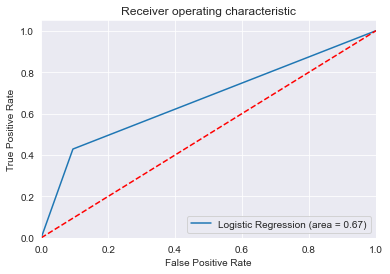

In [168]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#calculate auc score
logit_roc_auc = roc_auc_score(y_test, logreg_SGD.predict(x_test))

#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.
fpr, tpr, thresholds = roc_curve(y_test, logreg_SGD.predict_proba(x_test)[:,1])

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

#AUC ranges from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.   

Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. 

# Conclusion 
The model correctly identified 86% of the employees that left the organization.